**EXPLICACIÓN:**
Es la transferencia de estado cuánticos de un cúbit a otro,es decir, la tranferencia de información cuántica de un cúbit a otro.
¿Y por qué hacemos esto?
En ordenadores cuánticos, no se permite transferir copiando, porque cuando copias estás haciendo una medida de forma implícita, y se destruye el estado cuántico que estás intentando transferir de A a B.
Para evitar este problema, se aprovecha el entrelazamiento cuántico como recurso y construir un circuito.

**RESUMEN:**
Se busca pasar el estado cuántico de Q0 a Q2 sin determinar el estado del cubit.

In [1]:
# CIRCUITO DE TELETRANSPORTE CUÁNTICO:

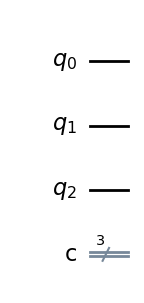

In [2]:
# Importo todo de qiskit
from qiskit import *

# Creo un circuito cuantico de 3 cubits y 3 bits
qc = QuantumCircuit(3, 3)

# Dibujo el circuito
%matplotlib inline
qc.draw(output='mpl')

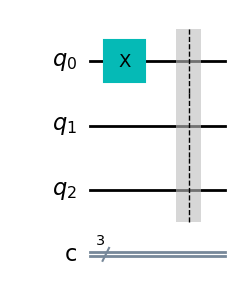

In [3]:
# Comienzo el circuito de teletransporte:
#     Tomo Q0 y transferir su estado cuántico a Q2
#     Q1 lo vamos a usar como recurso para este proceso

# Convierto el estado de Q0 a Q1:
# Aplico Puerta X:
qc.x(0)

# Creo una separación: Después de la barrera, Q0 = |1>
qc.barrier()

# Dibujo el circuito:
qc.draw(output='mpl')

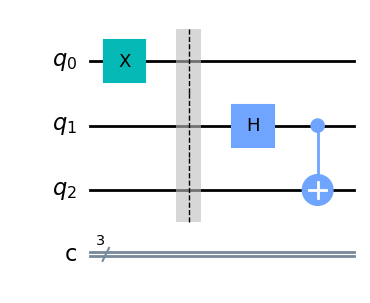

In [4]:
# Teleportamos el estado de Q0 a Q2:
#     Protocolo de teletransporte:

# Aplicamos la puerta de Hadamand a Q1
qc.h(1)
# Aplicamos la puerta X contralada: if Q1 then Q2
qc.cx(1, 2)

# Dibujo el circuito: CIRCUITO DE ENTRELAZAMIENTO
qc.draw(output='mpl')
      # Ahora Q1 y Q2 están ENTRELAZADOS

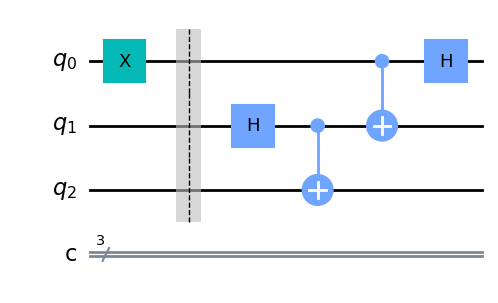

In [5]:
# Continuamos el protocolo de TELETRANSPORTE:

# Aplicamos X controlada 
qc.cx(0,1)

# Aplicamos puerta Hadaman
qc.h(0)

# Dibujo el circuito: CIRCUITO DE ENTRELAZAMIENTO
qc.draw(output='mpl')
      # Ahora Q1 y Q2 están ENTRELAZADOS

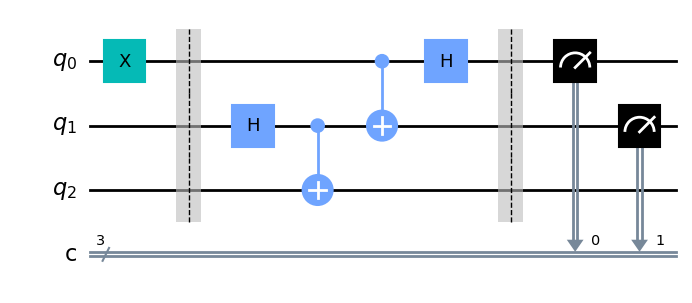

In [6]:
# Ponemos una barrera para dividir el circuito
qc.barrier()

# Realizamos las medidas en Q0 y Q1
qc.measure([0,1], [0,1])

# Dibujo el circuito: CIRCUITO DE ENTRELAZAMIENTO
qc.draw(output='mpl')

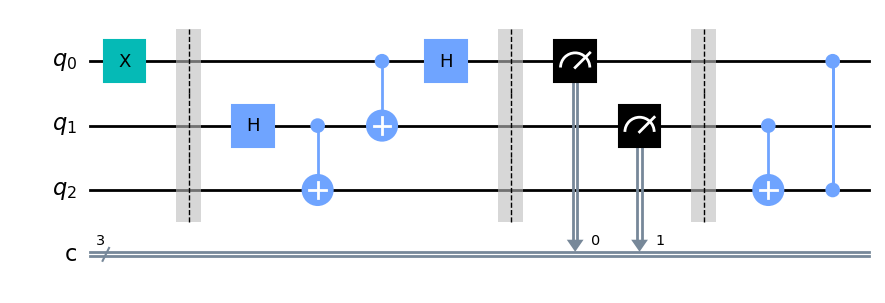

In [7]:
# Termino el teletransporte añadiendo 2 puertas mas:
# Ponemos una barrera para dividir el circuito
qc.barrier()

# Aplicamos X controlada 
qc.cx(1,2)
# Aplicamos Z controlada 
qc.cz(0,2)

# Dibujo el circuito: CIRCUITO DE ENTRELAZAMIENTO
qc.draw(output='mpl')

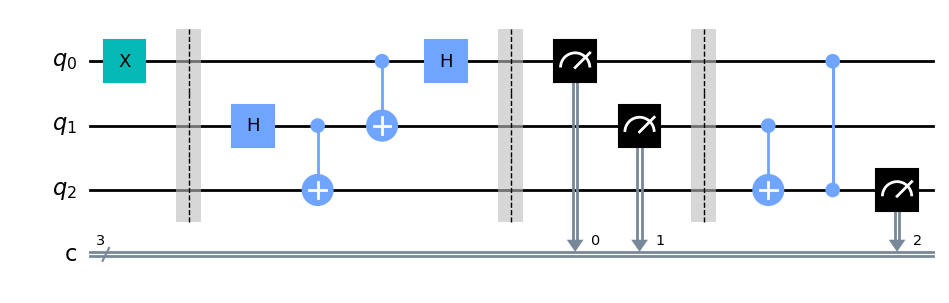

In [8]:
# Comprobamos el teletransporte midiendo Q2
# Q2 empieza en 0 y se le teltransporta el 1 del Q0:
# Mido el Q2:
qc.measure(2,2)

# Dibujo el circuito: CIRCUITO DE ENTRELAZAMIENTO
qc.draw(output='mpl')

In [9]:
# SIMULO EL CIRCUITO: MIDIENDO Q2 EN C2
# Importo el simulador de Qiskit:
simulador = Aer.get_backend('qasm_simulator')

#Ejecutamos el circuito 1024 veces y cogemos sus resultados:
resultados = execute(qc, backend = simulador, shots = 1024).result()

# Cogemos las cuentas del circuito:
cuentas = resultados.get_counts()

# Importamos las herramientas de visualización de qiskit
from qiskit.tools.visualization import plot_histogram

# Imprimo medidas:
print(cuentas)

{'111': 281, '100': 258, '101': 242, '110': 243}


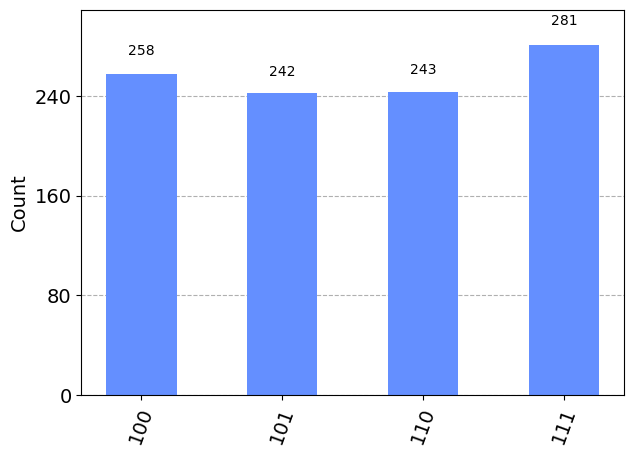

In [10]:
# Mostramos el resultado del circuito
plot_histogram(cuentas)

**EXPLICACIÓN RESULTADOS:**
    Eje X --> C2C1C0

Tomamos los resultado de medir Q2 y los hemos puesto en C2. Por esta razón, en el gráfico con el C2=1
También aparecen los resultados en C1 y C0 los resultados de Q1 y Q0 antes de la última barrera.
Se ha cogido el valor de Q0 al salir de la puerta X y se ha puesto en Q2.